After this module, you will be able to parse your datasets, generate pivot tables from your dataframe, use various data visualization libraries and generate different types of plots.

# Introduction to Python libraries

## Matplotlib and Seaborn
### Handy hints

Some Jupyter shortcut keys:

    Esc : get into Command mode (leaves Edit mode)
    Enter : edit a cell (puts you in Edit mode)
    h : see help (see all commands)
    Shift+Enter or Ctrl+Enter : run the code in the cell
    a / b : add new cell above/below
    m : turn current cell into a Markdown cell
    y : turn current cell into a Code cell
    1-6 : turn current cell into a heading (a type of Markdown cell)

As we have been practicing, you can get help on Python objects and functions with help() or the ? operator.

In general, we are using plotting libraries that return objects encapsulating the plot. You can check the type of these returned objects with type().




### Data

We will be using the publically available data on [emergency department visits for asthma in California](https://data.chhs.ca.gov/dataset/asthma-ed-visit-rates-lghc-indicator-07), from the [California Health and Human Services Open Data Portal](https://data.chhs.ca.gov/)

The downloaded filename is asthma-ed-visit-rates-lghc-indicator-07.csv, but I have saved a version of the file here as asthma.csv (in the datasets directory)


In [ ]:
# read the file 
import pandas as pd
df_asthma = pd.read_csv("../datasets/asthma.csv")

### [pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html): dict-like container for Series objects

In [ ]:
help(pd)

In [ ]:
df_asthma

In [ ]:
df_asthma.dtypes

In [ ]:
type(df_asthma)

In [ ]:
help(pd.unique)

This is a bit of a complicated table, as it stacks a number of different demographic categories in the same column ("Strata"). We can make it more easy to understand by looking at all the unique values in some of our columns.

In [ ]:
df_asthma['Age Group'].unique()

In [ ]:
df_asthma['Strata'].unique()

In [ ]:
df_asthma['Strata Name'].unique()

In [131]:
df_asthma.describe() #let's look at some stats

Year         Rate  LGHC Indicator ID  LGHC Target Rate
count  9484.000000  9370.000000             9484.0            9484.0
mean   2015.038170    66.991793                7.0              28.0
std       2.584401    86.053953                0.0               0.0
min    2011.000000     5.200000                7.0              28.0
25%    2013.000000    33.800000                7.0              28.0
50%    2015.000000    48.900000                7.0              28.0
75%    2017.000000    71.600000                7.0              28.0
max    2019.000000  4564.100000                7.0              28.0

In [132]:
df_asthma

LGHC Indicator Name   Geography  Year    Age Group            Strata  \
0     Asthma ED Visit Rates     Alameda  2015  18 and Over  Total Population   
1     Asthma ED Visit Rates      Amador  2015  18 and Over  Total Population   
2     Asthma ED Visit Rates       Butte  2015  18 and Over  Total Population   
3     Asthma ED Visit Rates   Calaveras  2015  18 and Over  Total Population   
4     Asthma ED Visit Rates  California  2015  18 and Over  Total Population   
...                     ...         ...   ...          ...               ...   
9479  Asthma ED Visit Rates      Tulare  2019     Under 18               Sex   
9480  Asthma ED Visit Rates    Tuolumne  2019     Under 18               Sex   
9481  Asthma ED Visit Rates     Ventura  2019     Under 18               Sex   
9482  Asthma ED Visit Rates        Yolo  2019     Under 18               Sex   
9483  Asthma ED Visit Rates        Yuba  2019     Under 18               Sex   

      Strata Name Numerator  Rate  LGHC Indicator ID  LGHC Target Rate  
0     18 and Over     6,513  53.1                  7                28  
1     18 and Over       151  49.1                  7                28  
2     18 and Over       736  43.8                  7                28  
3     18 and Over       139  42.7                  7                28  
4     18 and Over   117,854  40.0                  7                28  
...           ...       ...   ...                ...               ...  
9479         Male       597  81.2                  7                28  
9480         Male        37  90.0                  7                28  
9481         Male       602  61.0                  7                28  
9482         Male       135  52.4                  7                28  
9483         Male        59  52.9                  7                28  

[9484 rows x 10 columns]

Let's work with subsets of our dataframe for analysis and visualization. For this example, we will first create a subset that only includes the All Ages from within the Strata group.

In [ ]:
df_subset = df_asthma[df_asthma['Strata Name']=='All Ages']
df_subset.head()

In [143]:
df_asthma['Strata'].unique()

array(['Total Population', 'Race-Ethnicity', 'Sex'], dtype=object)

In [ ]:
df_asthma[df_asthma['Strata'] == 'Total Population']['Strata Name'].unique()

In [ ]:
type(df_asthma["Strata"] == "All Ages")

In [ ]:
type(df_asthma[df_asthma['Strata'] == 'Total Population'])

In [ ]:
df_asthma.size

In [ ]:
df_subset.size

Now, let's create a pivot table, to arrange the ED visit rate by year and geographical location:


In [ ]:
help(pd.pivot)

In [ ]:
# let's see an example that contains duplicate values in its rows
df_515 = pd.DataFrame({'HWs': ['HW_1', 'HW_1', 'HW_3', 'HW_4', 'HW_5',
                          'HW_6'],
                    'Lectures': ['Lecture_1', 'Lecture_1', 'Lecture3', 'Lecture4', 'Lecture5', 'Lecture6'],
                       'weeks': [1, 2, 3, 4, 5, 6]})

df_515

# index cannot contain duplicate values

In [ ]:
df_515.pivot(values='HWs', columns='weeks', index='Lectures')
#first two rows are the same for index and column arguments, we will get an error

In [ ]:
df_subset.head()

In [ ]:
# len(df_subset["Geography"]) == len(df_subset["Geography"].unique())

In [ ]:
#Back to the asthma dataset
df_pivot = df_subset.pivot( values='Rate', 
                            columns='Year', 
                            index='Geography'
                          )
df_pivot.head()

Here is a useful [post](http://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/) about reshaping data in pandas (pivot tables, stacking and unstacking columns)


### **Make a line plot of your data**

Matplotlib is a Python library that can be used to visualize data. The toolbox matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB. 

We will cover a few basic commands for formatting plots in this lesson. A great resource for help styling your figures is the [matplotlib gallery](http://matplotlib.org/gallery.html), which includes plots in many different styles and the source code that creates them. The simplest of plots is the 2 dimensional line plot. These examples walk through the basic commands for making line plots using pyplots.


In [ ]:
# First, import the library
import matplotlib.pyplot as plt

#By default, matplotlib will create the figure in a separate window.
# The following causes Jupyter to display any matplotlib plots directly in the notebook
%matplotlib inline

In [ ]:
my_numbers = [1.1, 4, 2.2, 5.7] # make a list
plt.plot(my_numbers);
plt.show()



The command `plt.show()` prompts Python to display the figure. Without it, it creates an object in memory but doesn't produce a visible plot. The ipython notebooks (if using `%matplotlib inline`) will automatically show you the figure even if you don't write `plt.show()`.

What is happening in the above figure?

When you provide the `plot()` function with only one list of numbers, it assumes that it is a sequence of y-values and plots them against their index (the first value in the list is plotted at `x=0`, the second at `x=1`, etc). If the function `plot()` receives two lists, it assumes the first one is the x-values and the second the y-values. The line connecting the points will follow the list in order:


In [ ]:
plt.plot([6.8, 4.3, 3.2, 8.1], my_numbers)
plt.show()

A third, optional argument in `plot()` is a string of characters that indicates the line type and color for the plot. The default value is a continuous blue line. For example, we can make the line red (`'r'`), with circles at every data point (`'o'`), and a dot-dash pattern (`'-.'`). Check out the [matplotlib gallery](https://matplotlib.org/2.0.2/gallery.html) for more examples.

In [ ]:
plt.plot([6.8, 4.3, 3.2, 8.1], my_numbers, 'g^:')
plt.axis([0,10,0,6]) #determines the axis borders
plt.xlabel('first set of numbers')
plt.ylabel('second set of numbers')
plt.title('a very silly figure')
plt.show()



The command `plt.axis()` sets the limits of the axes from a list of `[xmin, xmax, ymin, ymax]` values (the square brackets are needed because the argument for the function axis() is one list of values, not four separate numbers!).

`xlabel()` and `ylabel()` functions will label the axes, and `title()` will write a title above the figure.

A single figure can include multiple lines, and they can be plotted using the same `plt.plot()` command by adding more pairs of x values and y values.


In [ ]:
import numpy as np

# Create a numpy array between 0 and 10, with values evenly spaced every 0.5
t = np.arange(0., 10., 0.5) # similar to how we use range function in python

# Red dashes with no symbols, blue squares with a solid line, and green triangles with a dotted line
plt.plot(t, t, 'r--', t, t**2, 'bs-', t, t**3, 'g^:')

plt.xlabel('This is the x axis')
plt.ylabel('This is the y axis')
plt.title('This is the figure title')

plt.show()

In [ ]:
help(np.arange)

We can include a legend by adding the optional keyword argument `label=''` in `plot()`. 

Beware: We cannot add labels to multiple lines that are plotted simultaneously by the `plt.plot()` command like we did above. 

Why? Because Python won't know to which line to assign the value of the argument label. Instead, multiple lines can be plotted in the same figure by calling the `plot()` function several times:

In [ ]:
# Red dashes with no symbols, blue squares with a solid line, and green triangles with a dotted line
plt.plot(t, t, 'r--', label='linear')
plt.plot(t, t**2, 'bs-', label='square')
plt.plot(t, t**3, 'g^:', label='cubic')

plt.legend(loc='upper left', shadow=True, fontsize='medium')

plt.xlabel('This is the x axis')
plt.ylabel('This is the y axis')
plt.title('This is the figure title')

plt.show()



The function `legend()` adds a legend to the figure, and the optional keyword arguments change its style. By default, i.e., by typing just the `plt.legend()`, the legend is on the upper right corner and has no shadow.

The functions `xlabel`, `ylabel`, `title`, `legend`, and many others create text labels.

If you want to make more than one figure, you should use the command `plt.figure()` with an increasing figure number inside the parentheses:


In [ ]:
# This is the first figure
plt.figure(1)
plt.plot(t, t, 'r--', label='linear')

plt.legend(loc='upper left', shadow=True, fontsize='medium')
plt.title('This is figure 1')

plt.show()

# This is the second figure
plt.figure(2)
plt.plot(t, t**2, 'bs-', label='square')

plt.legend(loc='upper left', shadow=True, fontsize='medium')
plt.title('This is figure 2')

plt.show()

# This is the third figure
plt.figure(3)
plt.plot(t, t**3, 'g^-', label = 'cubic')

plt.legend(loc='upper left', shadow=True, fontsize='medium')
plt.title('This is figure 3')

plt.show()



A single figure can also include multiple plots in a grid pattern.

For instance, in the following example, we will create a figure, then add subplots to this SINGLE figure. The `add_subplot()` command specifies the number of rows, the number of columns, and the number of the space in the grid the given subplot will occupy:


In [ ]:
help(plt.figure)

In [ ]:
fig = plt.figure(figsize=(10,10), dpi=100)

fig.add_subplot(2,2,1)  # Two row, two columns, position 1
plt.plot(t, t, 'r--', label='linear')

fig.add_subplot(2,2,2)  # Two row, two columns, position 2
plt.plot(t, t**2, 'bs-', label='square')

fig.add_subplot(2,2,3)  # Two row, two columns, position 3
plt.plot(t, t**3, 'g^:', label='cubic')

fig.add_subplot(2,2,4)  # Two row, two columns, position 4
plt.plot(t, t**4, 'bo:', label='quadratic') #blue circle markers

plt.show()


### **Exporting/saving a figure**

If you have a figure that you would like to save from the notebook, you can do so by using the `plt.savefig()` command. Make sure to call this function after producing your figure, but before calling `plt.show()`. 

In the parentheses, enter the full filename and extension you would like to save the image to. Matplotlib can handle .png, .jpg, and .pdf, and a few other file types. Beware, you will not get a warning if the file already exists, it will just overwrite the existing file with the new one, so make sure you check first!


In [ ]:
import os

myfilename = "myfirstfigure.png"  # change this to whatever you want the file to be called. Include any directories in the name too (eg. "figures/myfirstfigure.png")

if os.path.exists(myfilename):
    print("File already exists! Be careful!")
else:
    plt.savefig(myfilename)

## **Plotting in Pandas**

The official [Pandas plotting documentation](https://pandas.pydata.org/pandas-docs/stable/visualization.html) helps to show the extent of the types of plots and basic presentation options available.

The exercises here are based on the [notes](http://jonathansoma.com/lede/algorithms-2017/) by Jonathan Soma, for the Algorithms course for the Lede Program at Columbia University Graduate School of Journalism.

First, let's remember what our dataframe looks like:


In [91]:
df_asthma.head()

LGHC Indicator Name   Geography  Year    Age Group            Strata  \
0  Asthma ED Visit Rates     Alameda  2015  18 and Over  Total Population   
1  Asthma ED Visit Rates      Amador  2015  18 and Over  Total Population   
2  Asthma ED Visit Rates       Butte  2015  18 and Over  Total Population   
3  Asthma ED Visit Rates   Calaveras  2015  18 and Over  Total Population   
4  Asthma ED Visit Rates  California  2015  18 and Over  Total Population   

   Strata Name Numerator  Rate  LGHC Indicator ID  LGHC Target Rate  
0  18 and Over     6,513  53.1                  7                28  
1  18 and Over       151  49.1                  7                28  
2  18 and Over       736  43.8                  7                28  
3  18 and Over       139  42.7                  7                28  
4  18 and Over   117,854  40.0                  7                28

In [92]:
df_asthma.dtypes

LGHC Indicator Name     object
Geography               object
Year                     int64
Age Group               object
Strata                  object
Strata Name             object
Numerator               object
Rate                   float64
LGHC Indicator ID        int64
LGHC Target Rate         int64
dtype: object

## **.plot()**

When used without any parameters, `df.plot()` plots the index against every column, adding every numerical column:

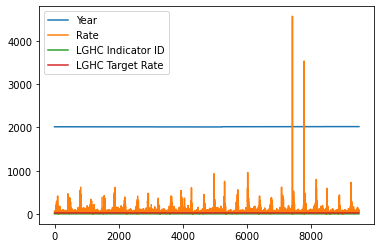

In [94]:
import matplotlib.pyplot as plt
df_asthma.plot()
plt.show()

This does not really look like a useful plot, does it? Instead, what we should do is to specify one column as the independent variable for the x-axis, and a second variable as the dependent variable for the y-axis. To specify these variables, we use the x and y parameters.

In [95]:
df_asthma.describe()

Year         Rate  LGHC Indicator ID  LGHC Target Rate
count  9484.000000  9370.000000             9484.0            9484.0
mean   2015.038170    66.991793                7.0              28.0
std       2.584401    86.053953                0.0               0.0
min    2011.000000     5.200000                7.0              28.0
25%    2013.000000    33.800000                7.0              28.0
50%    2015.000000    48.900000                7.0              28.0
75%    2017.000000    71.600000                7.0              28.0
max    2019.000000  4564.100000                7.0              28.0

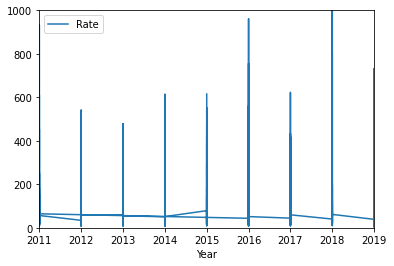

In [96]:
df_asthma.plot(x='Year', y='Rate')
plt.axis([2011,2019,0,1000])
plt.show()

It is as if each data point is connected. This is obviously not the case for our dataset. So the line plot does not seem to be a good choice for this dataset. We can specify the type of chart to generate using the `kind` parameter.

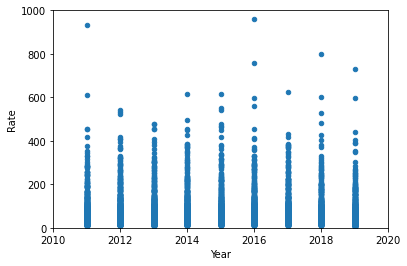

In [97]:
df_asthma.plot(x='Year', y='Rate', kind='scatter')
plt.axis([2010,2020,0,1000])
plt.show()



This is better, but with a high density of points, a box plot could be a better choice:


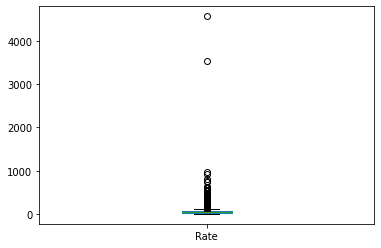

In [98]:
df_asthma.plot(x='Year', y='Rate', kind='box')
#plt.ylim([0,1000])
plt.show()

Or would it? Boxplot didn't really work in this case, because [the boxplot function works by drawing a single box for each column specified in the dataframe](https://www.w3resource.com/pandas/dataframe/dataframe-boxplot.php), so here everything got lumped together. In order to create the expected plot, we therefore have to use the pivoted table we created at the beginning:

In [ ]:
df_pivot.head()

In [ ]:
df_pivot.describe()

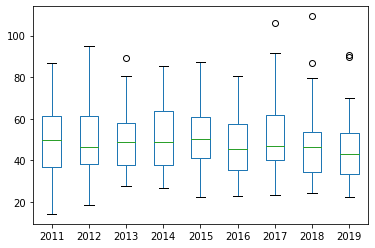

In [99]:
df_pivot.plot(kind='box')
plt.show()

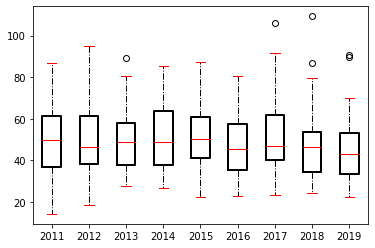

In [100]:
# Let's make an even more beautiful, detailed plot
# in plt.plot, all indexable objects are supported, what does that mean?
df_pivot.plot(kind='box',  
              color=dict(boxes='#BDA493', whiskers='g', medians='red', caps='red'),
              boxprops=dict(linestyle='-',linewidth=2.0, ),
              whiskerprops=dict(linestyle='-.',linewidth=1.0,)
             )
plt.show()

In [101]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

[More examples on coloring by category](https://kanoki.org/2020/08/30/matplotlib-scatter-plot-color-by-category-in-python/)

[A stackoverflow suggestion/explanation on the specific functions for boxplots](https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color/41997865)

[More on boxplots](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html)

Let's use matplotlib to generate multiple subplots

In [106]:
help(plt)

Help on module matplotlib.pyplot in matplotlib:

NAME
    matplotlib.pyplot

DESCRIPTION
    `matplotlib.pyplot` is a state-based interface to matplotlib. It provides
    a MATLAB-like way of plotting.
    
    pyplot is mainly intended for interactive plots and simple cases of
    programmatic plot generation::
    
        import numpy as np
        import matplotlib.pyplot as plt
    
        x = np.arange(0, 5, 0.1)
        y = np.sin(x)
        plt.plot(x, y)
    
    The object-oriented API is recommended for more complex plots.

FUNCTIONS
    acorr(x, *, data=None, **kwargs)
        Plot the autocorrelation of *x*.
        
        Parameters
        ----------
        x : array-like
        
        detrend : callable, default: `.mlab.detrend_none` (no detrending)
            A detrending function applied to *x*.  It must have the
            signature ::
        
                detrend(x: np.ndarray) -> np.ndarray
        
        normed : bool, default: True
            If `

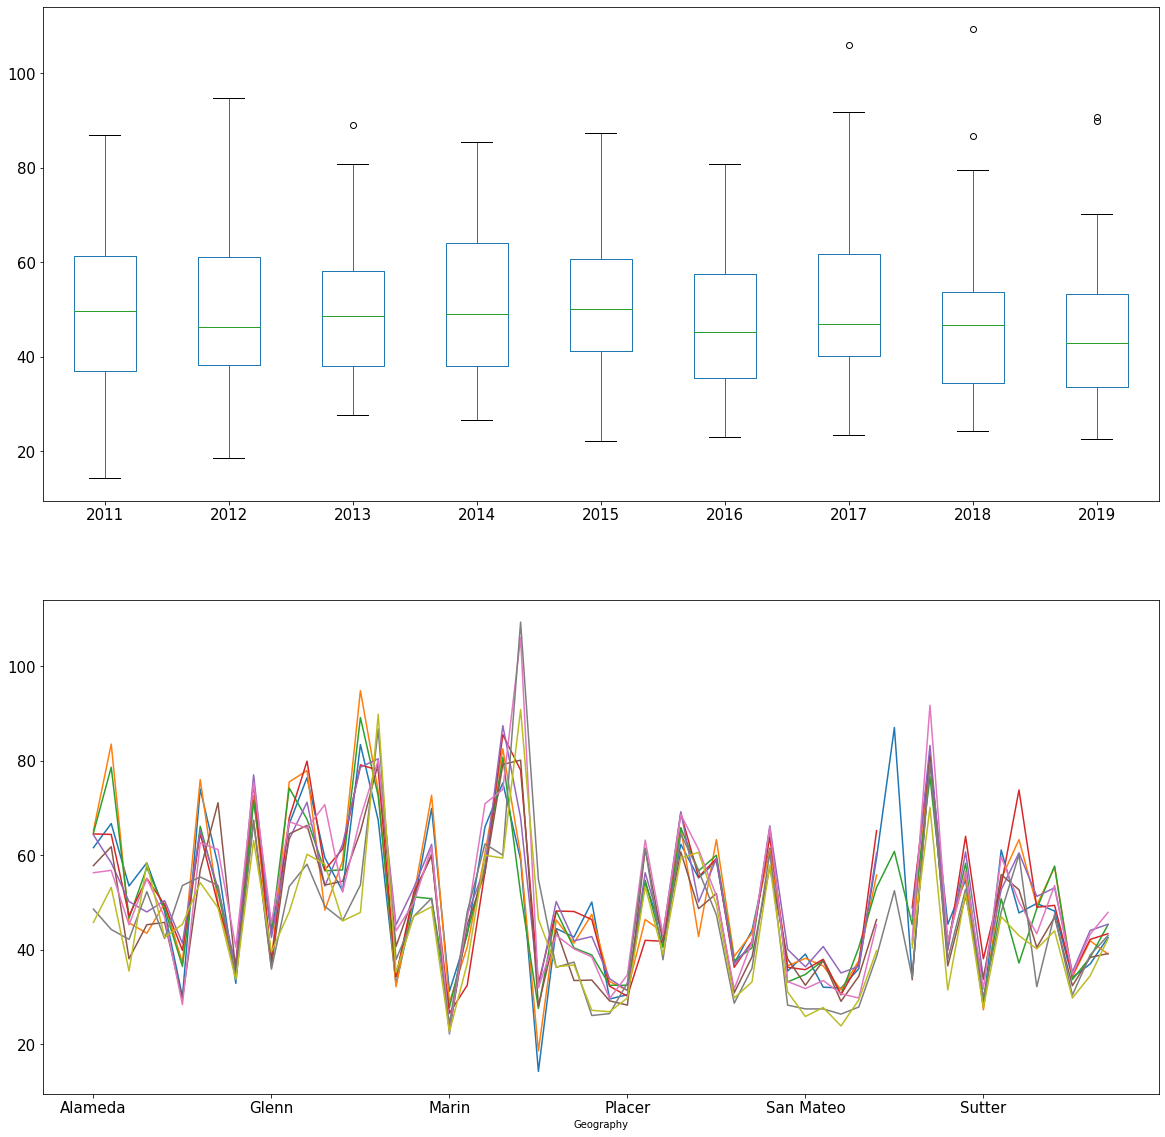

In [105]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,1,1)
df_pivot.plot(kind='box', ax=ax1, fontsize=15)

ax2 = fig.add_subplot(2,1,2)
df_pivot.plot(ax=ax2, legend=None, fontsize=15)

# setting label sizes after creation
ax.xaxis.label.set_size(20)
plt.draw()

plt.show()

## Seaborn

Seaborn improves on the default styling and the ease of use compared with Matplotlib. The main thing to note here, is that seaborn is not natively integrated with Pandas, so you can't get its functionality just using the `.plot()` function. Instead, you will need to import Seaborn separately, then feed it your Pandas dataframe. As you will soon see, this small extra step is worth the trouble. [Here](https://seaborn.pydata.org/api.html) you can find more about the Seaborn plots.

In [107]:
import seaborn as sns

In [112]:
df_subset.head()

LGHC Indicator Name   Geography  Year Age Group            Strata  \
356  Asthma ED Visit Rates     Alameda  2015  All Ages  Total Population   
357  Asthma ED Visit Rates      Amador  2015  All Ages  Total Population   
358  Asthma ED Visit Rates       Butte  2015  All Ages  Total Population   
359  Asthma ED Visit Rates   Calaveras  2015  All Ages  Total Population   
360  Asthma ED Visit Rates  California  2015  All Ages  Total Population   

    Strata Name Numerator  Rate  LGHC Indicator ID  LGHC Target Rate  
356    All Ages     9,939  64.3                  7                28  
357    All Ages       196  58.4                  7                28  
358    All Ages     1,044  50.2                  7                28  
359    All Ages       185  48.0                  7                28  
360    All Ages   191,904  50.4                  7                28

In [111]:
df_pivot.head()

Year        2011  2012  2013  2014  2015  2016  2017  2018  2019
Geography                                                       
Alameda     61.6  65.2  64.7  64.5  64.3  57.8  56.3  48.6  45.8
Amador      66.7  83.5  78.6  64.4  58.4  61.8  56.8  44.3  53.2
Butte       53.5  45.7  46.7  47.2  50.2  38.1  45.3  42.2  35.5
Calaveras   58.4  43.5  57.4  55.1  48.0  45.3  55.1  52.3  58.4
California  48.1  49.8  48.7  49.5  50.4  45.8  46.9  42.4  42.6

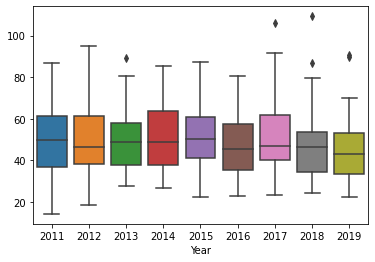

In [108]:
ax = sns.boxplot(data=df_pivot)

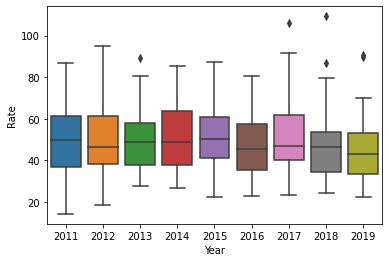

In [113]:
# With seaborn, we can avoid making a pivot table. How? 
ax = sns.boxplot(data=df_subset,
                 x='Year', y="Rate"
                )

It is also possible to further break down a seaborn boxplot using the `'hue'` parameter (to demonstrate this, we'll create another subset that is the total population strata, which includes three different age group breakdowns):

In [135]:
df_subset3 = df_asthma[df_asthma['Strata'] == 'Sex']
df_subset3

LGHC Indicator Name   Geography  Year    Age Group Strata Strata Name  \
243   Asthma ED Visit Rates     Alameda  2015  18 and Over    Sex      Female   
244   Asthma ED Visit Rates      Amador  2015  18 and Over    Sex      Female   
245   Asthma ED Visit Rates       Butte  2015  18 and Over    Sex      Female   
246   Asthma ED Visit Rates   Calaveras  2015  18 and Over    Sex      Female   
247   Asthma ED Visit Rates  California  2015  18 and Over    Sex      Female   
...                     ...         ...   ...          ...    ...         ...   
9479  Asthma ED Visit Rates      Tulare  2019     Under 18    Sex        Male   
9480  Asthma ED Visit Rates    Tuolumne  2019     Under 18    Sex        Male   
9481  Asthma ED Visit Rates     Ventura  2019     Under 18    Sex        Male   
9482  Asthma ED Visit Rates        Yolo  2019     Under 18    Sex        Male   
9483  Asthma ED Visit Rates        Yuba  2019     Under 18    Sex        Male   

     Numerator  Rate  LGHC Indicator ID  LGHC Target Rate  
243      3,828  60.5                  7                28  
244        113  79.4                  7                28  
245        439  52.6                  7                28  
246         96  59.4                  7                28  
247     73,315  49.2                  7                28  
...        ...   ...                ...               ...  
9479       597  81.2                  7                28  
9480        37  90.0                  7                28  
9481       602  61.0                  7                28  
9482       135  52.4                  7                28  
9483        59  52.9                  7                28  

[2980 rows x 10 columns]

In [138]:
df_subset3

LGHC Indicator Name   Geography  Year    Age Group Strata Strata Name  \
243   Asthma ED Visit Rates     Alameda  2015  18 and Over    Sex      Female   
244   Asthma ED Visit Rates      Amador  2015  18 and Over    Sex      Female   
245   Asthma ED Visit Rates       Butte  2015  18 and Over    Sex      Female   
246   Asthma ED Visit Rates   Calaveras  2015  18 and Over    Sex      Female   
247   Asthma ED Visit Rates  California  2015  18 and Over    Sex      Female   
...                     ...         ...   ...          ...    ...         ...   
9479  Asthma ED Visit Rates      Tulare  2019     Under 18    Sex        Male   
9480  Asthma ED Visit Rates    Tuolumne  2019     Under 18    Sex        Male   
9481  Asthma ED Visit Rates     Ventura  2019     Under 18    Sex        Male   
9482  Asthma ED Visit Rates        Yolo  2019     Under 18    Sex        Male   
9483  Asthma ED Visit Rates        Yuba  2019     Under 18    Sex        Male   

     Numerator  Rate  LGHC Indicator ID  LGHC Target Rate  
243      3,828  60.5                  7                28  
244        113  79.4                  7                28  
245        439  52.6                  7                28  
246         96  59.4                  7                28  
247     73,315  49.2                  7                28  
...        ...   ...                ...               ...  
9479       597  81.2                  7                28  
9480        37  90.0                  7                28  
9481       602  61.0                  7                28  
9482       135  52.4                  7                28  
9483        59  52.9                  7                28  

[2980 rows x 10 columns]

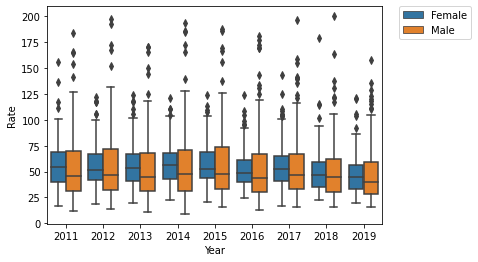

In [141]:
df_subset3 = df_asthma[df_asthma['Strata'] == 'Sex']
ax = sns.boxplot(data=df_subset3,
                 x='Year', y='Rate', hue='Strata Name',
                )

ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [144]:
# use Race-Ethnicity as hue and generate a box plot for each sub category in this column
df_subset4 = df_asthma[df_asthma['Strata'] == 'Race-Ethnicity']
df_subset4


LGHC Indicator Name     Geography  Year    Age Group          Strata  \
57    Asthma ED Visit Rates       Alameda  2015  18 and Over  Race-Ethnicity   
58    Asthma ED Visit Rates         Butte  2015  18 and Over  Race-Ethnicity   
59    Asthma ED Visit Rates    California  2015  18 and Over  Race-Ethnicity   
60    Asthma ED Visit Rates  Contra Costa  2015  18 and Over  Race-Ethnicity   
61    Asthma ED Visit Rates     El Dorado  2015  18 and Over  Race-Ethnicity   
...                     ...           ...   ...          ...             ...   
9376  Asthma ED Visit Rates        Tulare  2019     Under 18  Race-Ethnicity   
9377  Asthma ED Visit Rates      Tuolumne  2019     Under 18  Race-Ethnicity   
9378  Asthma ED Visit Rates       Ventura  2019     Under 18  Race-Ethnicity   
9379  Asthma ED Visit Rates          Yolo  2019     Under 18  Race-Ethnicity   
9380  Asthma ED Visit Rates          Yuba  2019     Under 18  Race-Ethnicity   

           Strata Name Numerator   Rate  LGHC Indicator ID  LGHC Target Rate  
57    African-American     2,930  195.2                  7                28  
58    African-American        63  219.7                  7                28  
59    African-American    25,317  144.6                  7                28  
60    African-American     1,474  203.9                  7                28  
61    African-American        14  163.9                  7                28  
...                ...       ...    ...                ...               ...  
9376             White       139   55.3                  7                28  
9377             White        50   82.0                  7                28  
9378             White       264   44.4                  7                28  
9379             White        58   31.5                  7                28  
9380             White        45   46.3                  7                28  

[4969 rows x 10 columns]

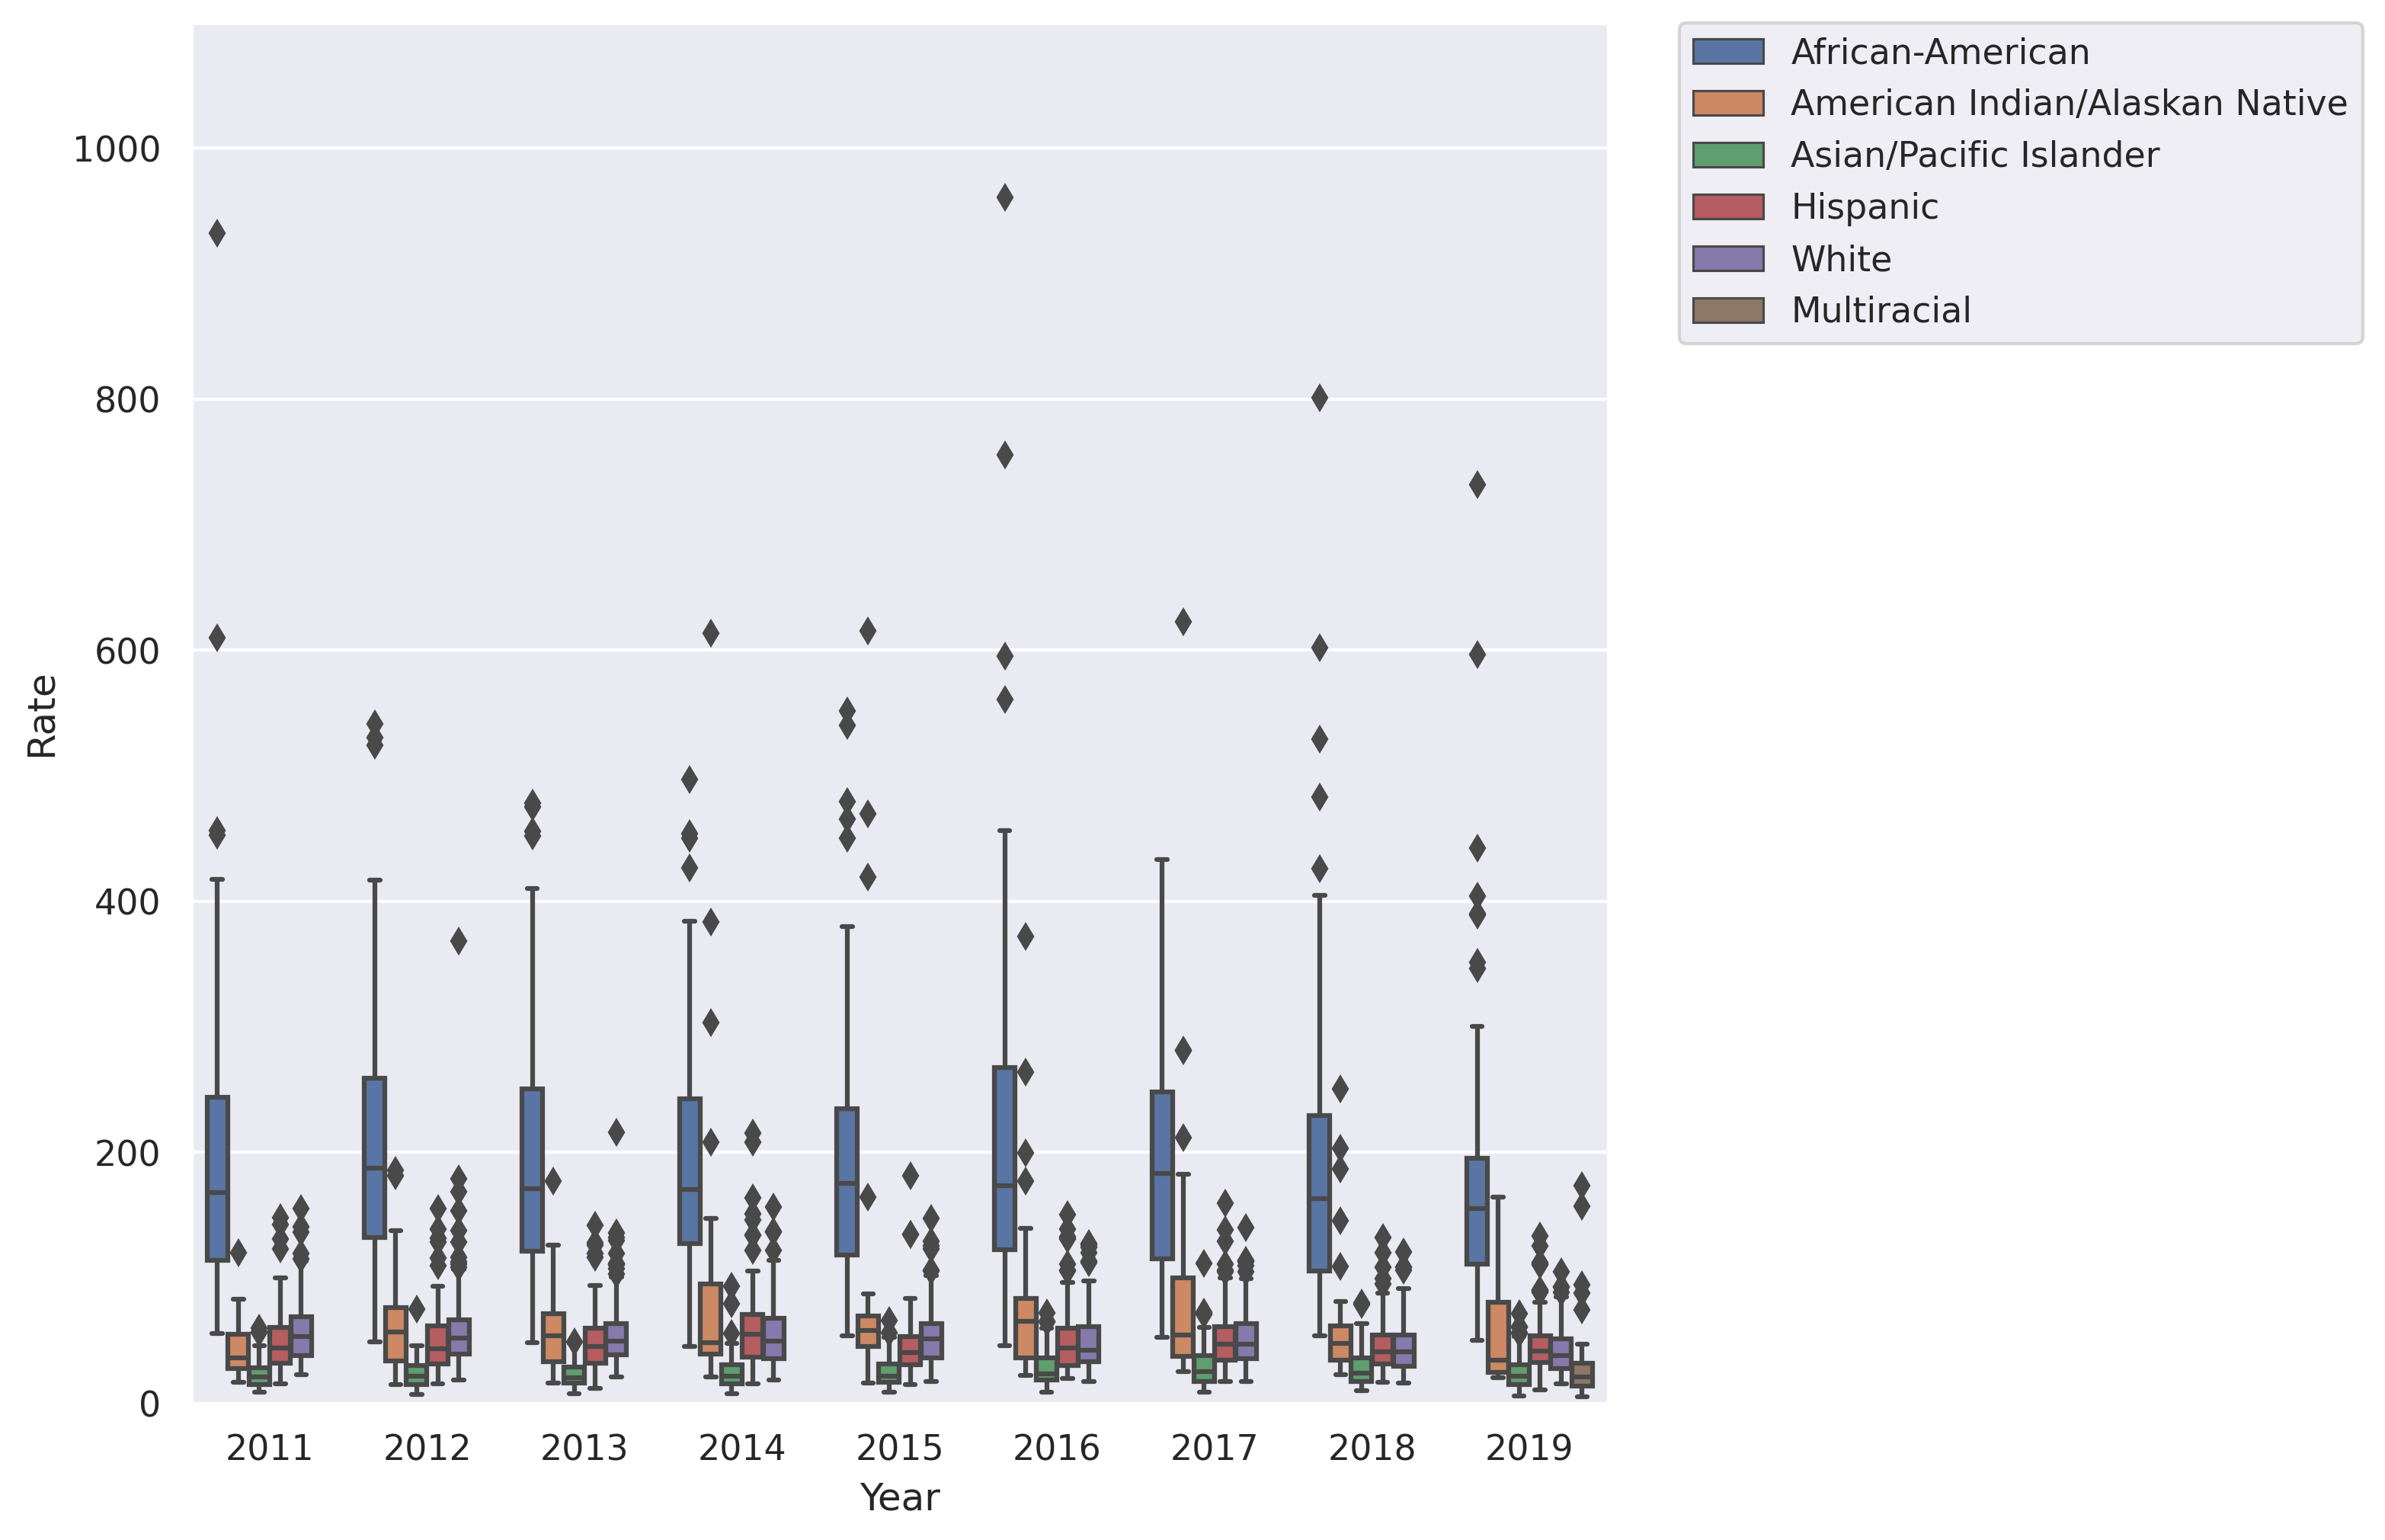

In [169]:
# the axes limits should be changed
# Axis label size can be changed

sns.set(rc = {'figure.figsize':(8,8),"figure.dpi":300})
#sns.set(rc= {"figure.dpi":300, 'savefig.dpi':300})
df_subset4 = df_asthma[df_asthma['Strata'] == 'Race-Ethnicity']
ax = sns.boxplot(data=df_subset4,
                 x='Year', y='Rate', hue='Strata Name')
ax.set_ylim([0,1100])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [159]:
help(sns.set)

Help on function set in module seaborn.rcmod:

set(*args, **kwargs)
    Alias for :func:`set_theme`, which is the preferred interface.
    
    This function may be removed in the future.



In [129]:
df_subset2.describe()

Year         Rate  LGHC Indicator ID  LGHC Target Rate
count  1535.000000  1529.000000             1535.0            1535.0
mean   2015.009121    54.221975                7.0              28.0
std       2.585169    23.334491                0.0               0.0
min    2011.000000    12.400000                7.0              28.0
25%    2013.000000    37.400000                7.0              28.0
50%    2015.000000    49.500000                7.0              28.0
75%    2017.000000    66.000000                7.0              28.0
max    2019.000000   186.000000                7.0              28.0

In [ ]:
# by mapping onto a pre-existing figure as in the previous section, we can also set the size to be more appropriate:

fig, ax = fig, ax = plt.subplots(figsize=(13,4))
ax = sns.boxplot(data=df_subset2,
                 x='Year', y='Rate', hue='Age Group',
                 ax=ax,
                )

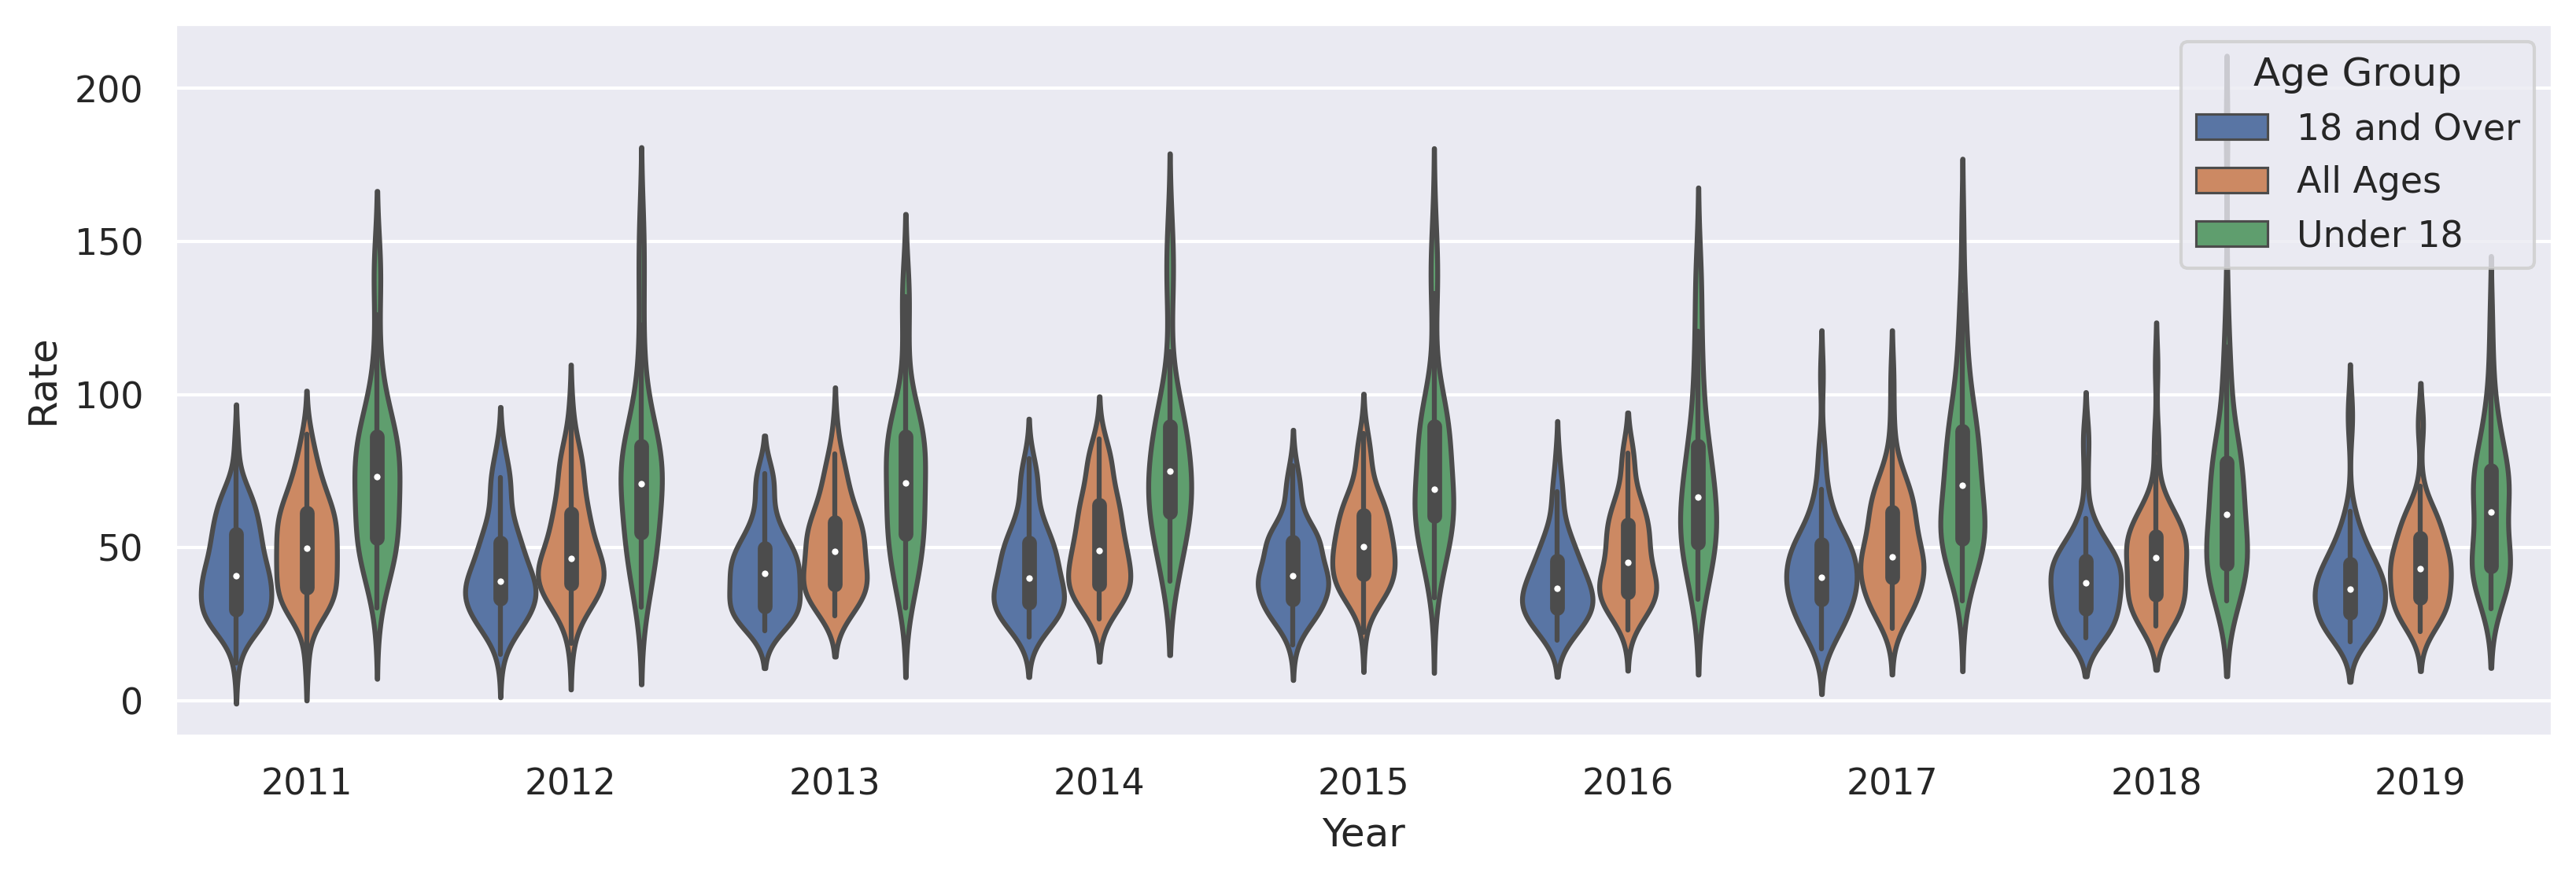

In [170]:
# violin plots with Seaborn
fig, ax = fig, ax = plt.subplots(figsize=(13,4))
ax = sns.violinplot(data=df_subset2,
                     x='Year', y='Rate', hue='Age Group',
                     ax=ax,
                    )

/home/baloglu/.local/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


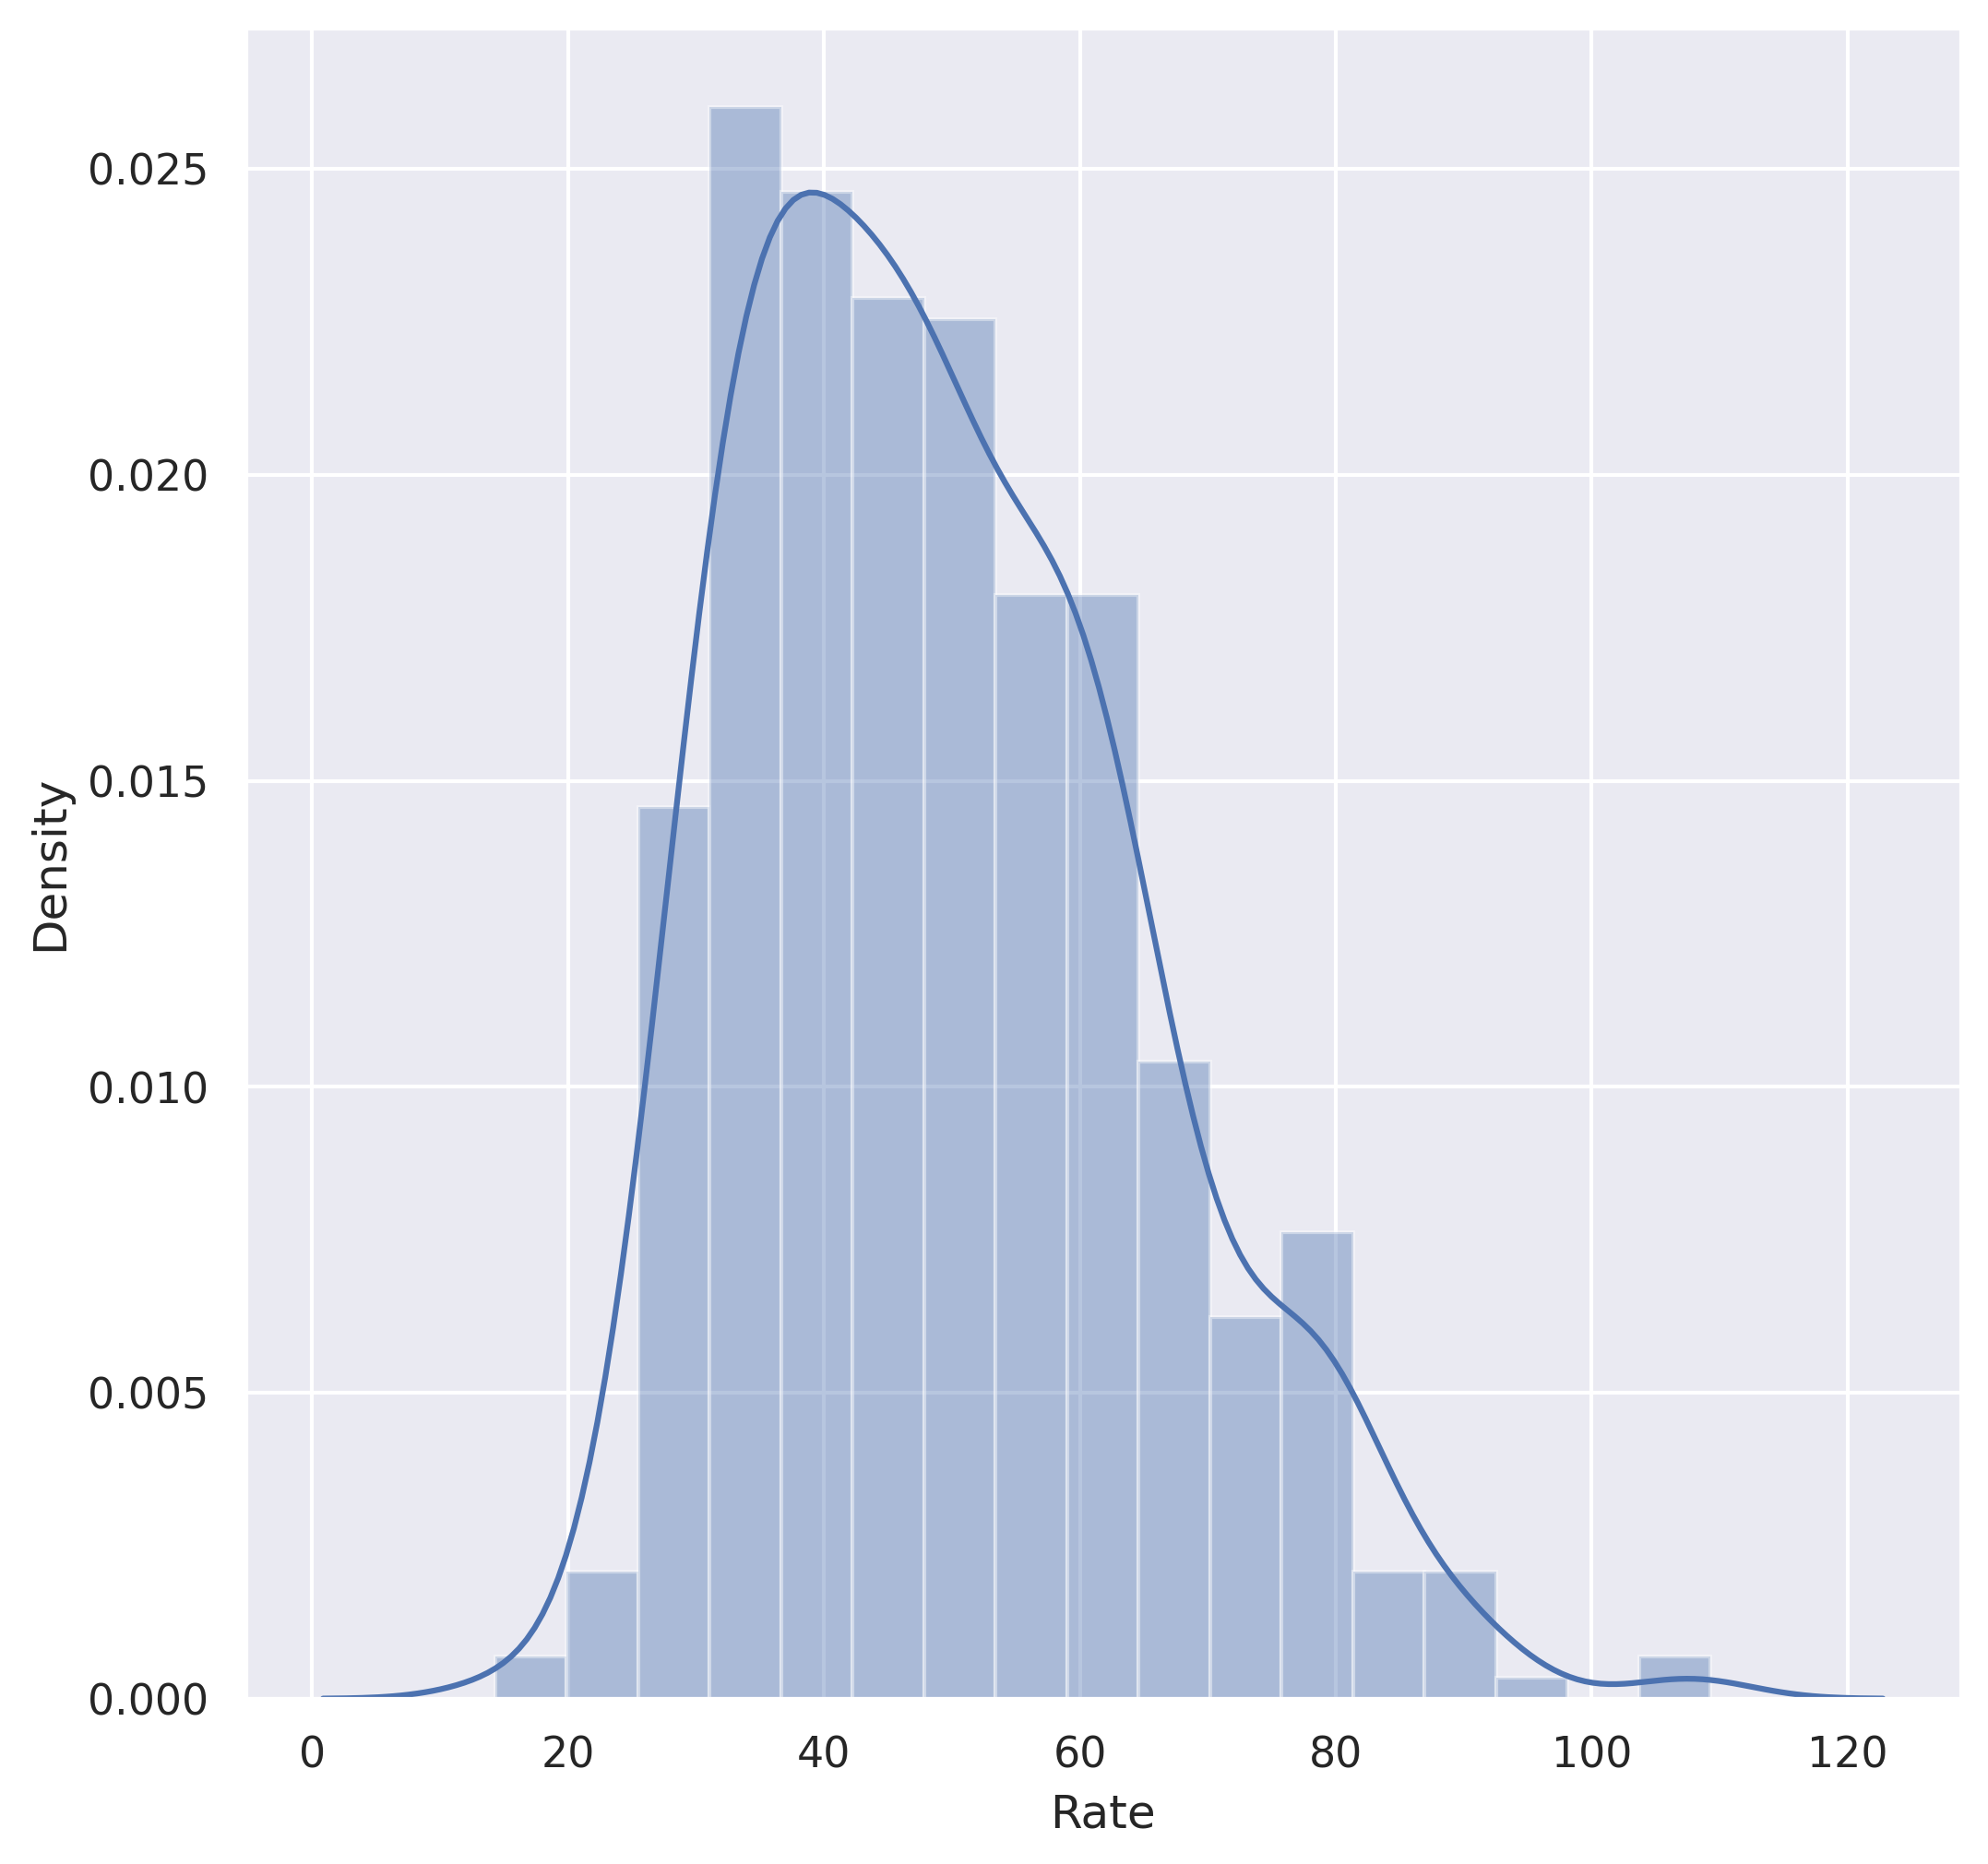

In [171]:
# histograms with Seaborn
sns.distplot(a=df_subset['Rate'].dropna())
plt.show()

Let's make a scatterplot (we will need another subset of our data for a useful scatterplot):

In [172]:
# create a new pivot table showing the rates per county according to age group:
df_pivot2 = df_subset2[df_subset2['Year']==2012].pivot(index='Geography', values='Rate', columns='Strata Name')

# view the first 5 rows:
df_pivot2.head()

Strata Name  18 and Over  All Ages  Under 18
Geography                                   
Alameda             58.4      65.2      84.6
Amador              81.9      83.5      88.0
Butte               42.6      45.7      54.8
Calaveras           42.5      43.5      46.5
California          39.6      49.8      79.4

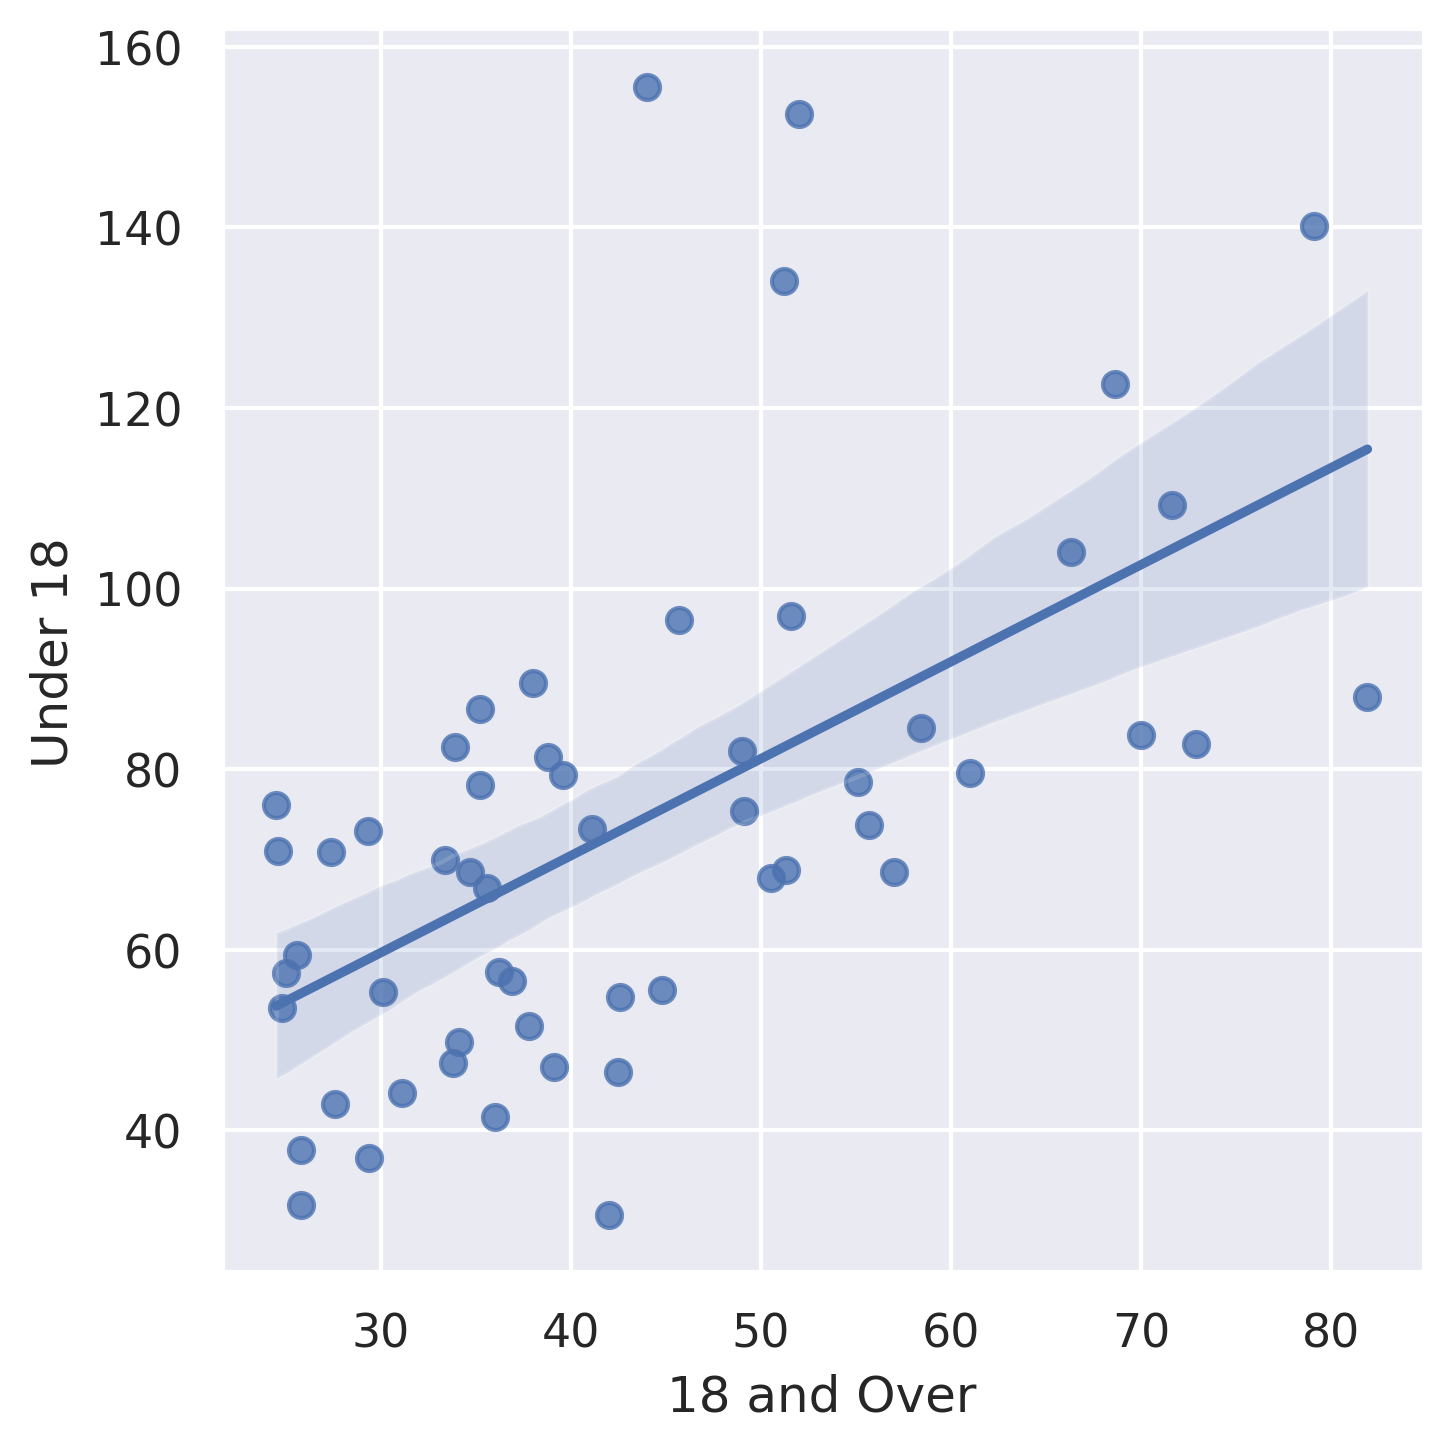

In [173]:
sns.lmplot(data=df_pivot2,
           x='18 and Over', y='Under 18', 
          )
plt.show()

In [177]:
# Now, let's add the data for 2013 and 2014:

# create a new pivot table showing the rates per county according to age group:
df_pivot3 = df_subset2[df_subset2['Year']==2013].pivot(index='Geography', values='Rate', columns='Strata Name')
df_pivot4 = df_subset2[df_subset2['Year']==2014].pivot(index='Geography', values='Rate', columns='Strata Name')

# add a column with the year:
df_pivot2['Year']=2012
df_pivot3['Year']=2013
df_pivot4['Year']=2014

# stack the tables vertically
df_concat = pd.concat([df_pivot2, df_pivot3, df_pivot4], axis=0)

# view first 5 rows:
df_concat.head()

Strata Name  18 and Over  All Ages  Under 18  Year
Geography                                         
Alameda             58.4      65.2      84.6  2012
Amador              81.9      83.5      88.0  2012
Butte               42.6      45.7      54.8  2012
Calaveras           42.5      43.5      46.5  2012
California          39.6      49.8      79.4  2012

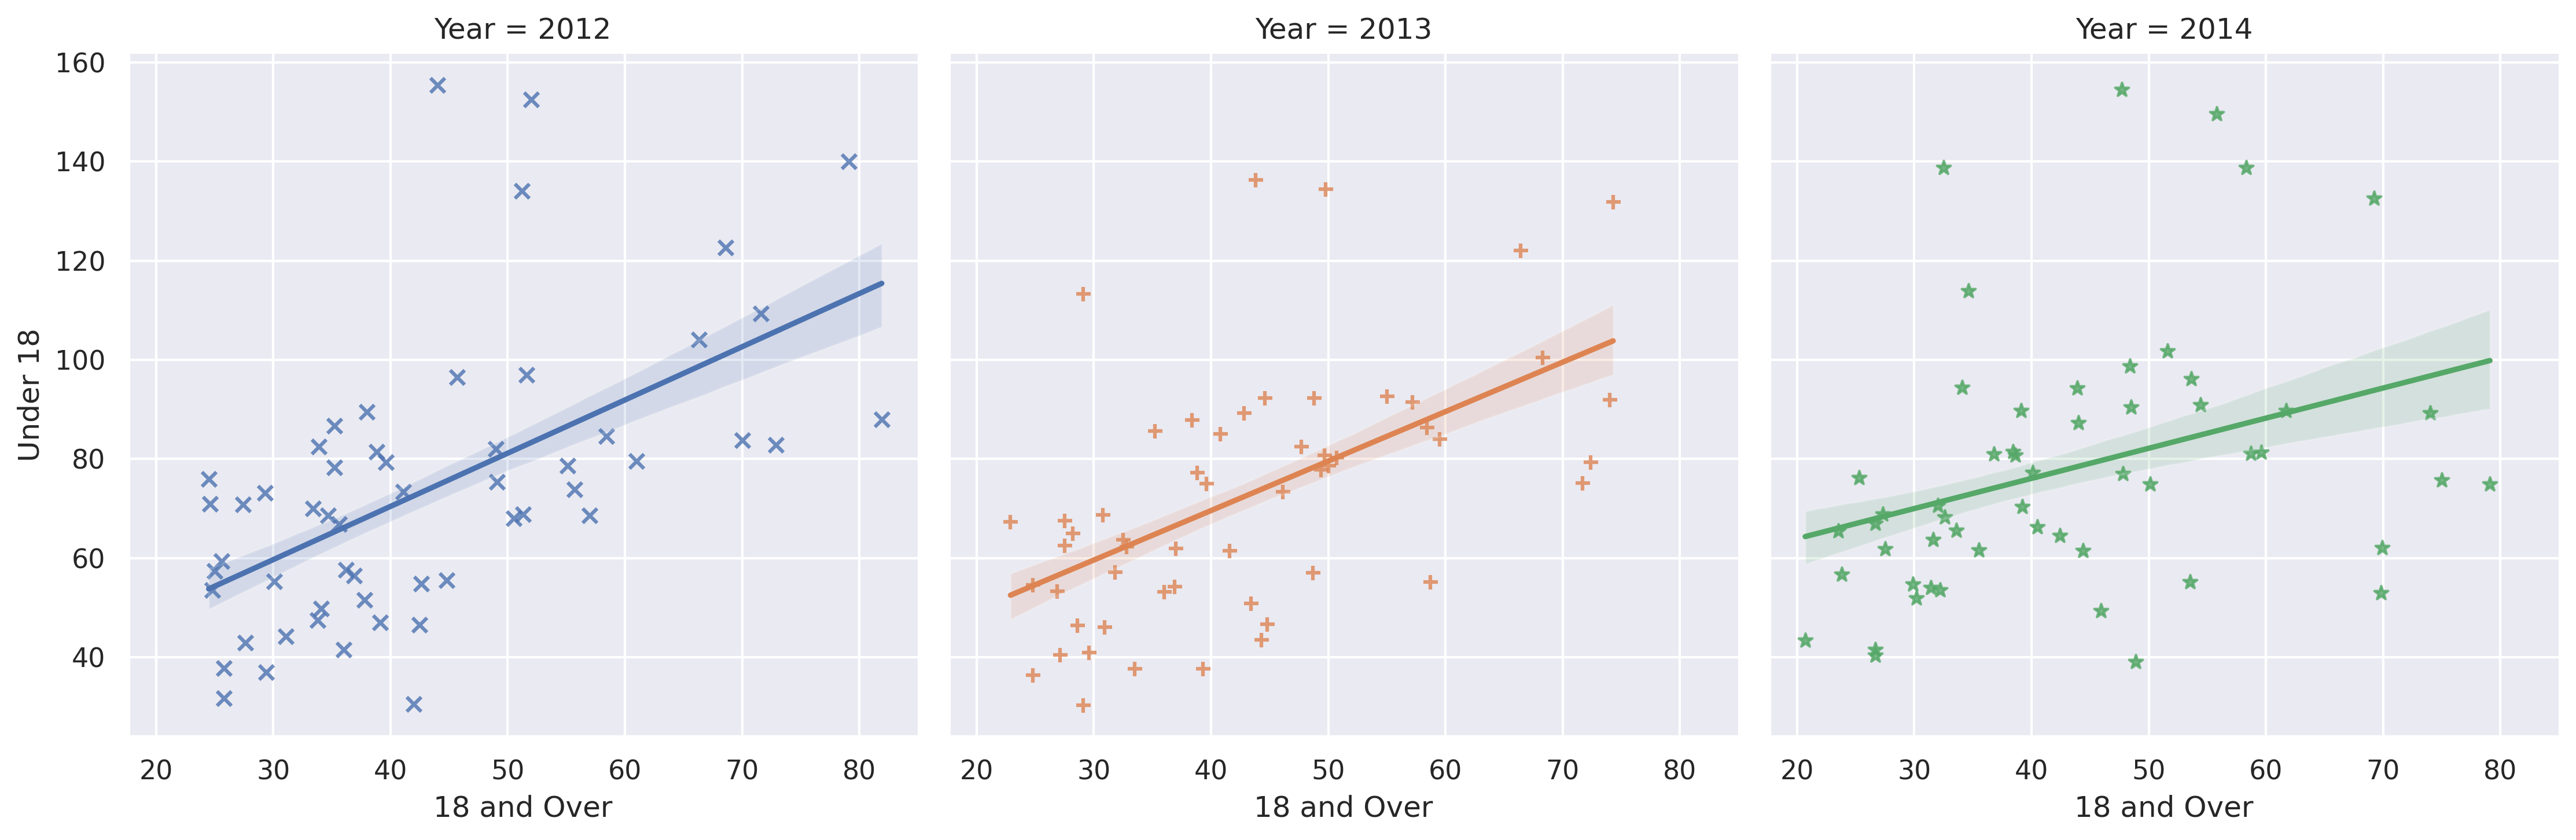

In [178]:
sns.lmplot(data=df_concat,
           x='18 and Over', y='Under 18', 
           hue='Year',                 # we want to display each year separately
           markers=['x', '+', '*'],    # change how each year's marker is displayed
           ci=68,                      # change the confidence interval for the shading 
           fit_reg=True,               # change to False if you want to remove the regression
           col='Year',                 # split the graph into subgraphs (can also use 'row')
          )
plt.show()

## [Bokeh](https://docs.bokeh.org/en/latest/docs/user_guide.html#userguide) 

In [ ]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.resources import INLINE
import bokeh.sampledata

In [179]:
bokeh.sampledata.download()

Using data directory: /home/baloglu/.bokeh/data
Skipping 'CGM.csv' (checksum match)
Skipping 'US_Counties.zip' (checksum match)
Skipping 'us_cities.json' (checksum match)
Skipping 'unemployment09.csv' (checksum match)
Skipping 'AAPL.csv' (checksum match)
Skipping 'FB.csv' (checksum match)
Skipping 'GOOG.csv' (checksum match)
Skipping 'IBM.csv' (checksum match)
Skipping 'MSFT.csv' (checksum match)
Skipping 'WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip' (checksum match)
Skipping 'gapminder_fertility.csv' (checksum match)
Skipping 'gapminder_population.csv' (checksum match)
Skipping 'gapminder_life_expectancy.csv' (checksum match)
Skipping 'gapminder_regions.csv' (checksum match)
Skipping 'world_cities.zip' (checksum match)
Skipping 'airports.json' (checksum match)
Skipping 'movies.db.zip' (checksum match)
Skipping 'airports.csv' (checksum match)
Skipping 'routes.csv' (checksum match)
Skipping 'haarcascade_frontalface_default.xml' (checksum match)


## [More on Bokeh sample datasets helper functions](http://docs.bokeh.org/en/1.3.4/_modules/bokeh/util/sampledata.html) for downloading and accessing sample data

In [180]:
from bokeh.sampledata.autompg import autompg_clean as autompg_df
autompg_df.head()

mpg  cyl  displ   hp  weight  accel  yr         origin  \
0  18.0    8  307.0  130    3504   12.0  70  North America   
1  15.0    8  350.0  165    3693   11.5  70  North America   
2  18.0    8  318.0  150    3436   11.0  70  North America   
3  16.0    8  304.0  150    3433   12.0  70  North America   
4  17.0    8  302.0  140    3449   10.5  70  North America   

                        name        mfr  
0  chevrolet chevelle malibu  chevrolet  
1          buick skylark 320      buick  
2         plymouth satellite   plymouth  
3              amc rebel sst        amc  
4                ford torino       ford

In [203]:
# bar plot

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

output_file("bar_colormapped_veggies.html")

veggies = ['Leek', 'Onion', 'Shallot', 'Garlic', 'Scallion', 'Chive']
counts = [2, 8, 3, 25, 3, 5]

source = ColumnDataSource(data=dict(veggies=veggies, counts=counts))

p = figure(x_range=veggies, plot_height=350, toolbar_location=None, title="Vegetable Counts")
p.vbar(x='veggies', top='counts', width=0.9, source=source, legend_field="veggies",
       line_color='white', fill_color=factor_cmap('veggies', palette=Spectral6, factors=veggies))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 9
#p.legend.orientation = "horizontal"
#p.legend.location = "top_left"

#p.legend.glyph_height=50
#p.legend.label_width=2
#p.legend.label_height=2
#p.legend.glyph_height = 1
#p.legend.glyph_width = 1

#p.add_layout(p.legend, 'right')

show(p)

KeyboardInterrupt: 

In [204]:
# bar plot

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

output_file("bar_colormapped_veggies.html")

veggies = ['Leek', 'Onion', 'Shallot', 'Garlic', 'Scallion', 'Chive']
counts = [2, 8, 3, 25, 3, 5]

source = ColumnDataSource(data=dict(veggies=veggies, counts=counts))

p = figure(x_range=veggies, plot_height=350, toolbar_location=None, title="Vegetable Counts")
p.vbar(x='veggies', top='counts', width=0.9, source=source,
       line_color='white', fill_color=factor_cmap('veggies', palette=Spectral6, factors=veggies))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.y_range.end = 9


show(p)

KeyboardInterrupt: 

In [184]:
help(bokeh.plotting)

Help on package bokeh.plotting in bokeh:

NAME
    bokeh.plotting

DESCRIPTION
    #-----------------------------------------------------------------------------
    # Copyright (c) 2012 - 2021, Anaconda, Inc., and Bokeh Contributors.
    # All rights reserved.
    #
    # The full license is in the file LICENSE.txt, distributed with this software.
    #-----------------------------------------------------------------------------

PACKAGE CONTENTS
    _decorators
    _docstring
    _graph
    _legends
    _plot
    _renderer
    _stack
    _tools
    figure
    gmap
    graph

SUBMODULES
    _figure

CLASSES
    bokeh.models.layouts.Box(bokeh.models.layouts.LayoutDOM)
        bokeh.models.layouts.Column
        bokeh.models.layouts.Row
    bokeh.models.map_plots.GMapPlot(bokeh.models.map_plots.MapPlot)
        bokeh.plotting.gmap.GMap
    bokeh.models.plots.Plot(bokeh.models.layouts.LayoutDOM)
        bokeh.plotting.figure.Figure
    bokeh.models.sources.ColumnarDataSource(bokeh.models

In [205]:
from bokeh.sampledata.autompg import autompg as df
df

mpg cyl  displ   hp  weight  accel  yr  origin  \
0    18.0   8  307.0  130    3504   12.0  70       1   
1    15.0   8  350.0  165    3693   11.5  70       1   
2    18.0   8  318.0  150    3436   11.0  70       1   
3    16.0   8  304.0  150    3433   12.0  70       1   
4    17.0   8  302.0  140    3449   10.5  70       1   
..    ...  ..    ...  ...     ...    ...  ..     ...   
387  27.0   4  140.0   86    2790   15.6  82       1   
388  44.0   4   97.0   52    2130   24.6  82       2   
389  32.0   4  135.0   84    2295   11.6  82       1   
390  28.0   4  120.0   79    2625   18.6  82       1   
391  31.0   4  119.0   82    2720   19.4  82       1   

                          name  
0    chevrolet chevelle malibu  
1            buick skylark 320  
2           plymouth satellite  
3                amc rebel sst  
4                  ford torino  
..                         ...  
387            ford mustang gl  
388                  vw pickup  
389              dodge rampage  
390                ford ranger  
391                 chevy s-10  

[392 rows x 9 columns]

In [207]:
from bokeh.io import output_file, show
from bokeh.palettes import Spectral5
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg as df
from bokeh.transform import factor_cmap

df.cyl = df.cyl.astype(str)
group = df.groupby('cyl')

cyl_cmap = factor_cmap('cyl', palette=Spectral5, factors=sorted(df.cyl.unique()))

p = figure(plot_height=350, x_range=group, title="MPG by the number of Cylinders",
           toolbar_location=None, tools="")

p.vbar(x='cyl', top='mpg_mean', width=0.9, source=group,
       line_color=cyl_cmap, fill_color=cyl_cmap)

p.y_range.start = 0
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "cylinder number"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)

KeyboardInterrupt: 

In [208]:
# Scatter plot with Bokeh 

from bokeh.plotting import figure, output_file, show
from bokeh.sampledata.iris import flowers

colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers["petal_length"], flowers["petal_width"],
         color=colors, fill_alpha=0.2, size=10)

output_file("iris_sample.html", title="iris.py example")

show(p)

KeyboardInterrupt: 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
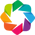

:Violin   [Groups,Categories]   (Values)

In [ ]:
# Violin plot with Bokeh

import numpy as np
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')
groups = [chr(65+g) for g in np.random.randint(0, 3, 500)]
violin = hv.Violin((groups, np.random.randint(0, 9, 500), np.random.randn(500)),
                    ['Groups', 'Categories'], 'Values')
violin.opts(opts.Violin(height=600, show_legend=False, width=500, violin_color=hv.dim('Category').str()), clone=True)

In [ ]:
import numpy as np

from bokeh.plotting import figure, output_file, show

x = np.linspace(0.1, 5, 100)

p = figure(title="log axis first example", y_axis_type="log",
           x_range=(0, 5), y_range=(0.001, 10**5),
           background_fill_color="#2F2F2F")

p.line(x, np.sqrt(x), legend_label="y=sqrt(x)",
       line_color="tomato", line_dash="dashed")

p.line(x, x, legend_label="linear")
p.circle(x, x, legend_label="y=x")

p.line(x, x**2, legend_label="square")
p.circle(x, x**2, legend_label="y=x**2",
         fill_color=None, line_color="olivedrab")

p.line(x, x**3, legend_label="cubic")
p.circle(x, x**3, legend_label="cubic",
         line_color="gold", line_width=2)

p.legend.location = "top_left"

output_file("logplot.html", title="log plot first example")

show(p)

## [more on chr() function](https://www.tutorialspoint.com/chr-in-python)

In [ ]:
help(np.random.randint)

## [More on creating different kinds of bokeh plots](https://vishalmnemonic.github.io/_posts/2018-11-09-DC13/)

## [More resources on data plotting, if you are curious](https://datacarpentry.org/python-ecology-lesson/08-putting-it-all-together/index.html)
